<h1> VISUALIZATION DATA

<H1> UNIVARIATE VISUALIZATION

<h3> BAR CHART

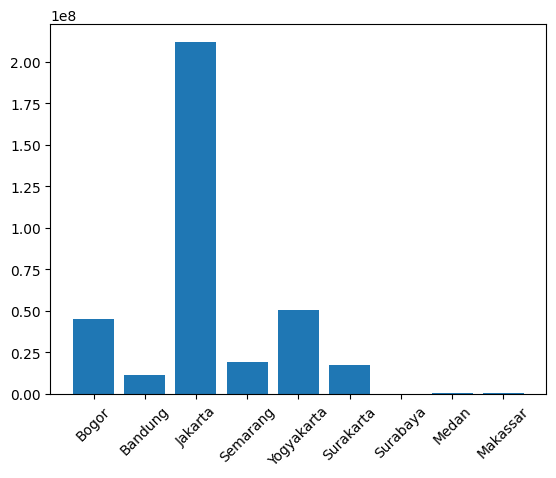

In [130]:
import matplotlib.pyplot as plt
 
cities = ('Bogor', 'Bandung', 'Jakarta', 'Semarang', 'Yogyakarta', 'Surakarta','Surabaya', 'Medan', 'Makassar')
 
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 17579085,3481, 287750, 785409)
 
plt.bar(x=cities, height=populations)
plt.xticks(rotation=45)
# plt.legend(title="Lines", loc="upper left")
plt.show()

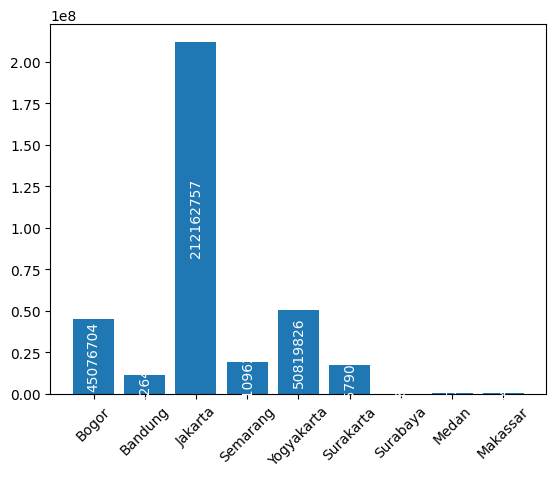

In [131]:
# jika menuliskan nilai angka spesifik di dalam chart

bars = plt.bar(x=cities, height=populations)

for bar in bars:
    yval = bar.get_height()  # Mengambil tinggi batang
    xval = bar.get_x() + bar.get_width() / 2  # Mengambil posisi tengah batang
    plt.text(xval, yval / 2, str(int(yval)), ha='center', va='center', color='white', rotation=90)

plt.xticks(rotation=45)
plt.show()

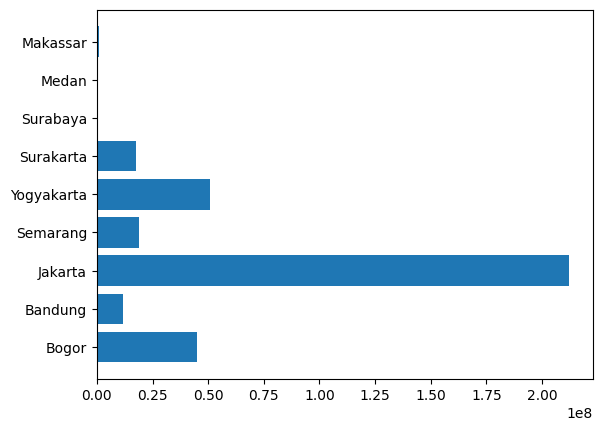

In [132]:
plt.barh(y=cities, width=populations)
plt.show()

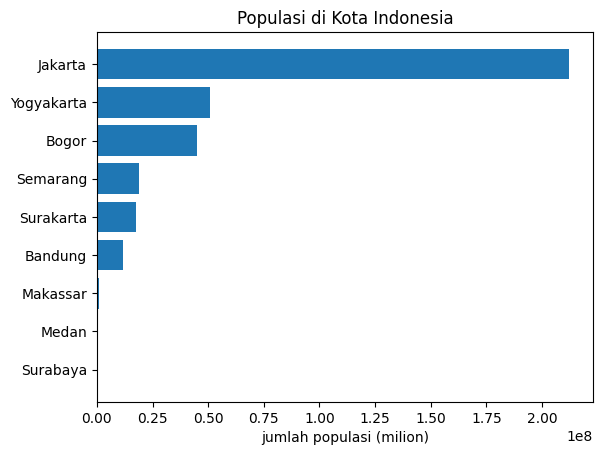

In [133]:
# ini untuk tampilan agar sort urut
import pandas as pd
 
df = pd.DataFrame({
    'Cities': cities,
    'Population': populations,
})
 
df.sort_values(by='Population', inplace=True)
 
plt.barh(y=df["Cities"], width=df["Population"])
plt.xlabel("jumlah populasi (milion)")
plt.title("Populasi di Kota Indonesia")
plt.show()

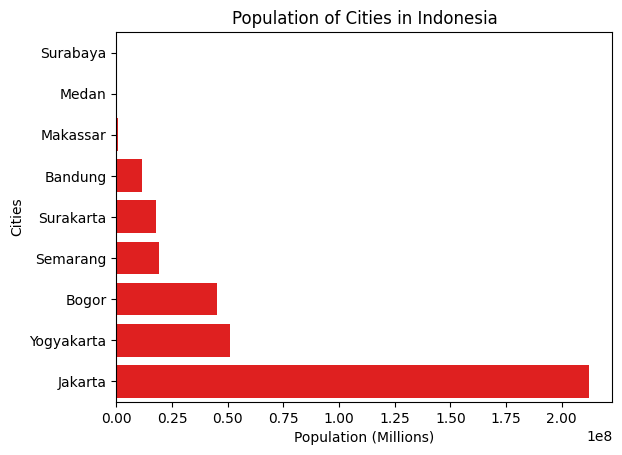

In [134]:
# menggunakan seaborn
# barchart function barplot()

import seaborn as sns
 
sns.barplot(y=df["Cities"], x=df["Population"], orient="h", color='red')
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

<h3> PIE CHART

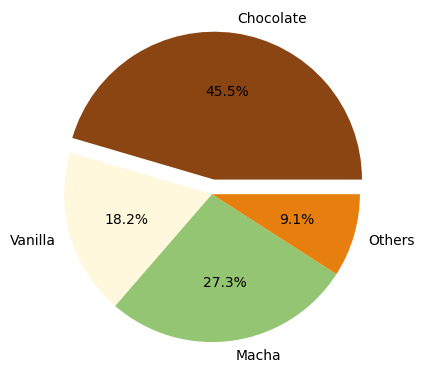

In [135]:
# digunakan untuk menggambarkan perbandingan frekuensi tiap kategori pada suatu data kategoris

import matplotlib.pyplot as plt
 
flavors = ('Chocolate', 'Vanilla', 'Macha', 'Others')
votes = (50, 20, 30, 10)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)
 
plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

# RESULT KENAPA HASIL PERSENTASE BEDA TIDAK SESUAI KARENA NILAINYA DIBAGI DENGAN JUMLAH DATA

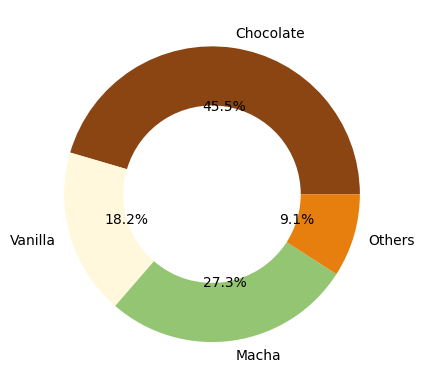

In [136]:
# UNTUK MENGHASILKAN DONUT PLOT DENGAN wedgepros
plt.pie(
    x=votes,
    labels=flavors,
    colors=colors,
    autopct='%1.1f%%',
    wedgeprops = {'width': 0.4}
)
plt.show()

<H3> HISTOGRAM

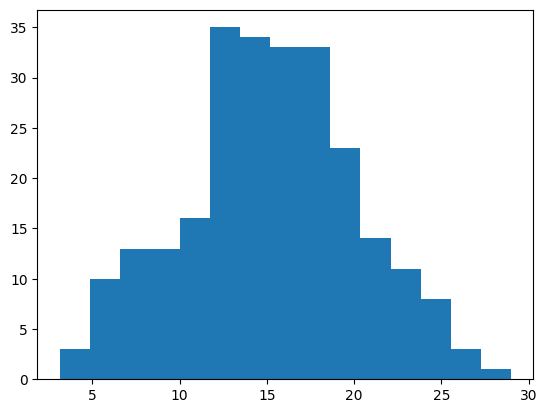

In [137]:
# UNTUK DATA KUANTITATIF ATAU NUMERIK
# sumbu X digunakan untuk menampung range nilai dari data kuantitatif yang dikenal dengan istilah bins.

import matplotlib.pyplot as plt
import numpy as np
 
x = np.random.normal(15, 5, 250)
 
plt.hist(x=x, bins=15)
plt.show()

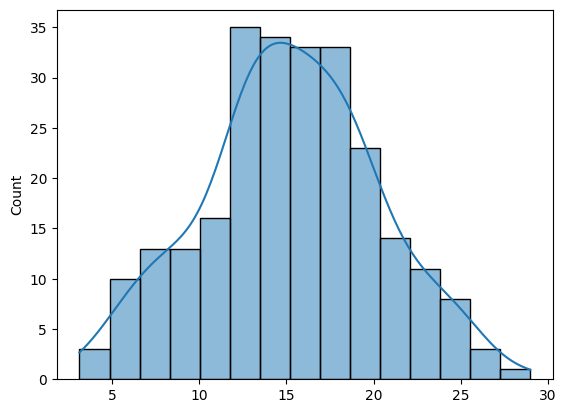

In [138]:
# JIKA DENGAN SEABORN\

import seaborn as sns
 
sns.histplot(x=x, bins=15, kde=True)
plt.show()

<H3> BOX PLOT

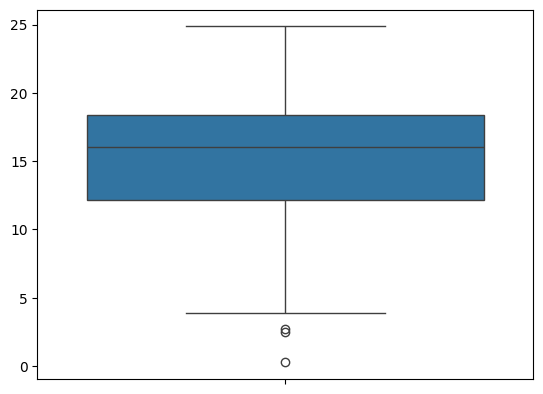

In [139]:
# digunakan untuk mengidentifikasi outlier atau pencilan yang ada pada data kuantitatif
# INI UNTUK CARI DISTRIBUSI VISUALISASI BATAS ATAS DAN BATAS BAWAH

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
x = np.random.normal(15, 5, 250)
sns.boxplot(x)
plt.show()

<H1> Bivariate dan Multivariate Visualization

<H3> SCATTER PLOT

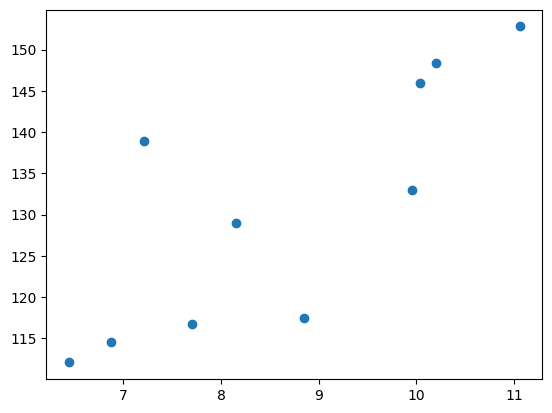

In [140]:
# contoh tampilan scatter plot untuk dua variabel data.

import matplotlib.pyplot as plt
 
lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15, 
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93, 
                132.93, 138.92, 145.98, 148.44, 152.81]
 
plt.scatter(x=lemon_diameter, y=lemon_weight)
plt.show()

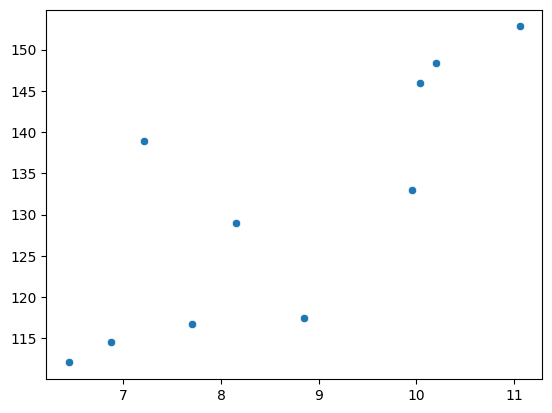

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.scatterplot(x=lemon_diameter, y=lemon_weight)
plt.show()

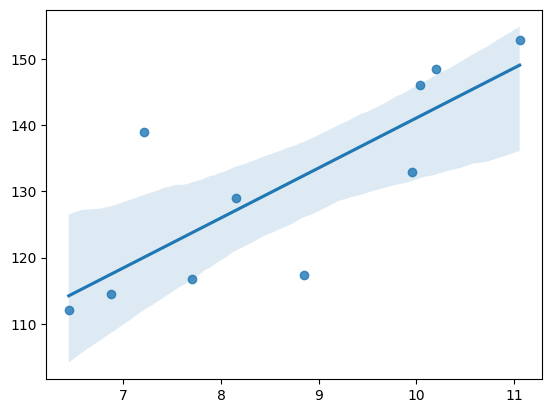

In [142]:
# Function tersebut memadukan scatter plot dan regression function (metode statistik untuk memperkirakan korelasi antar independent dan dependent variable) untuk melihat tren serta korelasi antar variabel. 
# MENGGUNAKAN reqplot()

sns.regplot(x=lemon_diameter, y=lemon_weight)
plt.show()

<h3> LINE CHART

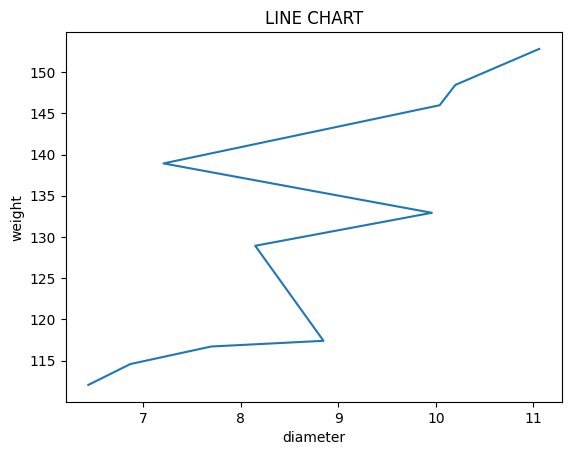

In [143]:
# untuk menggambarkan tren nilai dari suatu variabel terhadap variabel lain

import matplotlib.pyplot as plt
 
lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15, 
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93, 
                132.93, 138.92, 145.98, 148.44, 152.81]
 
plt.plot(lemon_diameter, lemon_weight)
plt.title("LINE CHART")
plt.xlabel("diameter")
plt.ylabel("weight")
plt.show()

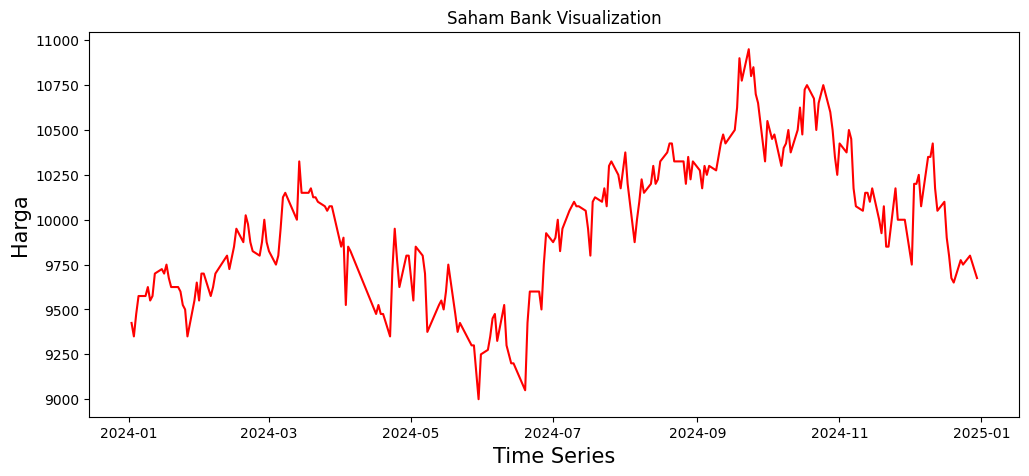

In [144]:
# contoh 

import pandas as pd
import matplotlib.pyplot as plt
import requests
 
url = 'https://query1.finance.yahoo.com/v8/finance/chart/BBCA.JK?events=capitalGain%7Cdiv%7Csplit&formatted=true&includeAdjustedClose=true&interval=1d&period1=1704165596&period2=1735689600&symbol=BBCA&userYfid=true&lang=en-US&region=US'
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
 
# Ambil data dari URL
response = requests.get(url, headers=headers)
 
# Konversi data JSON menjadi DataFrame
data = response.json()
 
# Ekstraksi data dari JSON
timestamps = data['chart']['result'][0]['timestamp']
indicators = data['chart']['result'][0]['indicators']['quote'][0]
 
# Membuat DataFrame
df = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='s'),
    'open': indicators['open'],
    'high': indicators['high'],
    'low': indicators['low'],
    'close': indicators['close'],
    'volume': indicators['volume'],
})
 
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['close'], color='red')
plt.title("Saham Bank Visualization")
plt.xlabel('Time Series',size=15)
plt.ylabel('Harga',size=15)
plt.show()

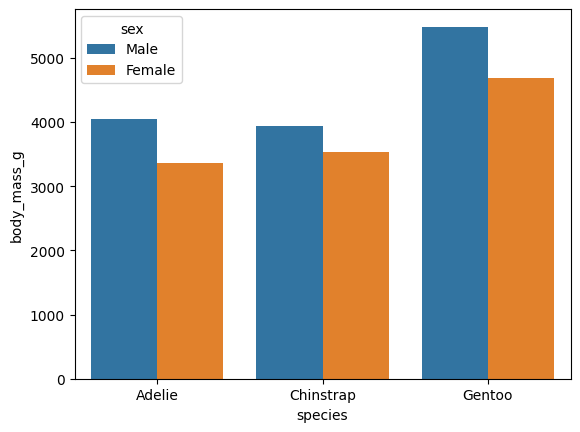

In [145]:
# Clustered Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt
 
penguins = sns.load_dataset("penguins")
 
sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", errorbar=None)
plt.show()

In [146]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [147]:
penguins["sex"].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [148]:
# jumlahKelamin = penguins["sex"].value_counts()

# bars = plt.bar(x=jumlahKelamin.index, height=jumlahKelamin.values)
# # Menambahkan angka di dalam batang (di tengah batang)
# for bar in bars:
#     yval = bar.get_height()  # Mengambil tinggi batang
#     xval = bar.get_x() + bar.get_width() / 2  # Mengambil posisi tengah batang
#     plt.text(xval, yval / 2, str(int(yval)), ha='center', va='center', color='white')
# plt.show()

In [149]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
 
# url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
# df = pd.read_csv(url)
# df['Date'] = pd.to_datetime(df['Date'])
 
# df_boxplot = df[["Open", "High", "Low", "Close", "Adj Close"]]
 
# sns.boxplot(data=df_boxplot, palette="rocket")
# plt.ylabel('Price',size=15)
# plt.show()

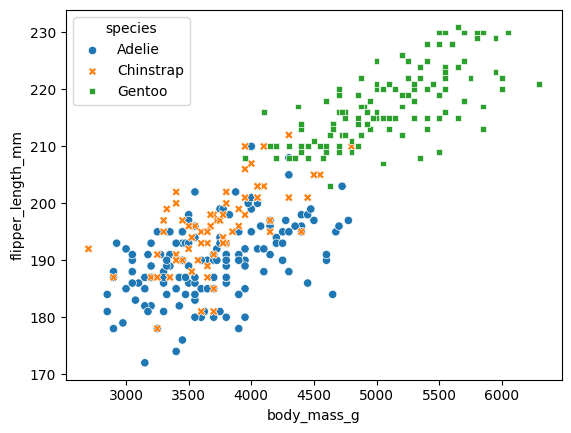

In [150]:
# dua dimensi 
import seaborn as sns
 
penguins = sns.load_dataset("penguins")
 
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", style="species")
plt.show()

In [151]:
# import pandas as pd
# import matplotlib.pyplot as plt
 
# url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
# df = pd.read_csv(url)
# df['Date'] = pd.to_datetime(df['Date'])

# plt.figure(figsize=(12, 5))
# plt.plot(df['Date'], df['Close'], label='Close', color='red')
# plt.plot(df['Date'], df['Open'], label='Open', color='blue')
# plt.title('BBCA Stock Price', size=20)
# plt.xlabel('Date',size=15)
# plt.ylabel('Price (IDR)',size=15)
# plt.legend()
# plt.show()

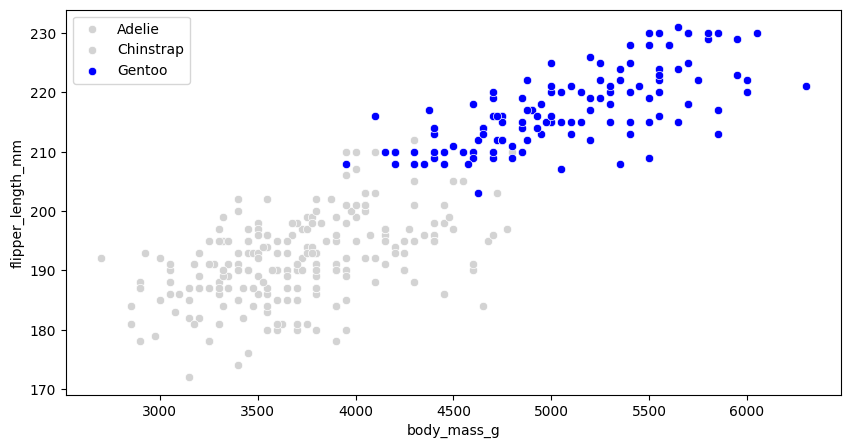

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
 
penguins_df = sns.load_dataset("penguins")
 
adelie_df = penguins_df[penguins_df.species == "Adelie"]
chinstrap_df = penguins_df[penguins_df.species == "Chinstrap"]
gentoo_df = penguins_df[penguins_df.species == "Gentoo"]
 
plt.figure(figsize=(10, 5))
sns.scatterplot(data=adelie_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Adelie")
sns.scatterplot(data=chinstrap_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Chinstrap")
sns.scatterplot(data=gentoo_df, x="body_mass_g", y="flipper_length_mm", facecolor="blue", label="Gentoo")
plt.legend()
plt.show()